In [1]:
from fastccm import PairwiseCCM, utils, ccm_utils
from fastccm.data import get_truncated_lorenz_rand
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

### Time statistics

In [2]:

def time_ccm_computation(X_emb, Y_emb, trials=3, device="cpu", method="simplex"):
    
    torch.cuda.empty_cache()
    ccm = PairwiseCCM(device=device, dtype="float32", compute_dtype="float32") 

    start_time = time.time()
    for _ in range(trials):
        ccm.score_matrix(X_emb, Y_emb, library_size=1600, sample_size=550, exclusion_window=30, tp=0, method=method, nbrs_num=10, theta=5, batch_size=128 )
    total_time =  time.time() - start_time
    
    avg_time = total_time / trials * 1000
    time_per_pair = avg_time / len(X_emb) / len(Y_emb)
    
    return avg_time, time_per_pair


In [3]:
timeseries_counts = [1, 2, 5, 10, 15, 20, 30, 50, 100, 150, 200, 300, 400,500]

In [4]:
X_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 5))
Y_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 1))

In [13]:

results_cpu = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="simplex")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 18.876553ms, Time per pair = 18.876553ms
N_sys=2: Avg time = 15.105406ms, Time per pair = 3.776352ms
N_sys=5: Avg time = 19.251267ms, Time per pair = 0.770051ms
N_sys=10: Avg time = 26.233276ms, Time per pair = 0.262333ms
N_sys=15: Avg time = 34.307082ms, Time per pair = 0.152476ms
N_sys=20: Avg time = 47.180414ms, Time per pair = 0.117951ms
N_sys=30: Avg time = 55.291971ms, Time per pair = 0.061436ms
N_sys=50: Avg time = 84.115426ms, Time per pair = 0.033646ms
N_sys=100: Avg time = 177.012285ms, Time per pair = 0.017701ms
N_sys=150: Avg time = 283.339977ms, Time per pair = 0.012593ms
N_sys=200: Avg time = 435.654322ms, Time per pair = 0.010891ms
N_sys=300: Avg time = 791.186015ms, Time per pair = 0.008791ms
N_sys=400: Avg time = 1246.278048ms, Time per pair = 0.007789ms
N_sys=500: Avg time = 1913.532337ms, Time per pair = 0.007654ms


In [6]:

results_cuda = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cuda")
    results_cuda += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 79.303980ms, Time per pair = 79.303980ms
N_sys=2: Avg time = 3.723621ms, Time per pair = 0.930905ms
N_sys=5: Avg time = 8.126656ms, Time per pair = 0.325066ms
N_sys=10: Avg time = 15.083869ms, Time per pair = 0.150839ms
N_sys=15: Avg time = 29.739300ms, Time per pair = 0.132175ms
N_sys=20: Avg time = 44.549942ms, Time per pair = 0.111375ms
N_sys=30: Avg time = 65.174739ms, Time per pair = 0.072416ms
N_sys=50: Avg time = 109.695355ms, Time per pair = 0.043878ms
N_sys=100: Avg time = 180.672089ms, Time per pair = 0.018067ms
N_sys=150: Avg time = 235.135714ms, Time per pair = 0.010450ms
N_sys=200: Avg time = 319.715897ms, Time per pair = 0.007993ms
N_sys=300: Avg time = 508.354346ms, Time per pair = 0.005648ms
N_sys=400: Avg time = 728.284200ms, Time per pair = 0.004552ms
N_sys=500: Avg time = 994.916280ms, Time per pair = 0.003980ms


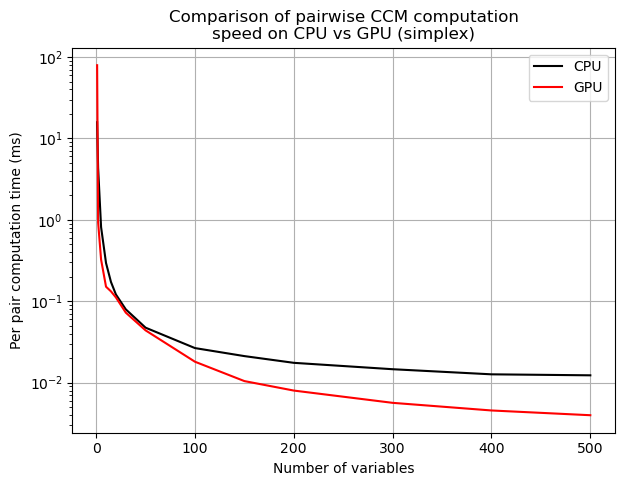

In [7]:
plt.figure(figsize=(7,5))
plt.title("Comparison of pairwise CCM computation\nspeed on CPU vs GPU (simplex)")
plt.plot(timeseries_counts, results_cpu, color="black", label="CPU")
plt.plot(timeseries_counts, results_cuda, color="red", label="GPU")
plt.yscale("log")
plt.xlabel("Number of variables")
plt.ylabel("Per pair computation time (ms)")
plt.legend()
plt.grid()

In [5]:

results_cpu = []
for count in timeseries_counts[5:7]:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="smap")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=20: Avg time = 5753.753344ms, Time per pair = 14.384383ms
N_sys=30: Avg time = 12993.956327ms, Time per pair = 14.437729ms


In [5]:

results_cpu = []
for count in timeseries_counts[5:7]:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="smap")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=20: Avg time = 5064.637343ms, Time per pair = 12.661593ms
N_sys=30: Avg time = 11402.898630ms, Time per pair = 12.669887ms


In [13]:
torch.cuda.get_device_name()

'NVIDIA RTX 3500 Ada Generation Laptop GPU'